            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


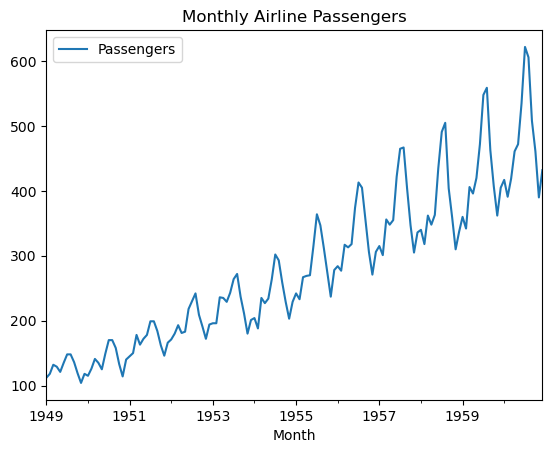

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Sample dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Show head and plot
print(data.head())
data.plot(title='Monthly Airline Passengers')
plt.show()



In [19]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: 0.8153688792060597
p-value: 0.9918802434376411


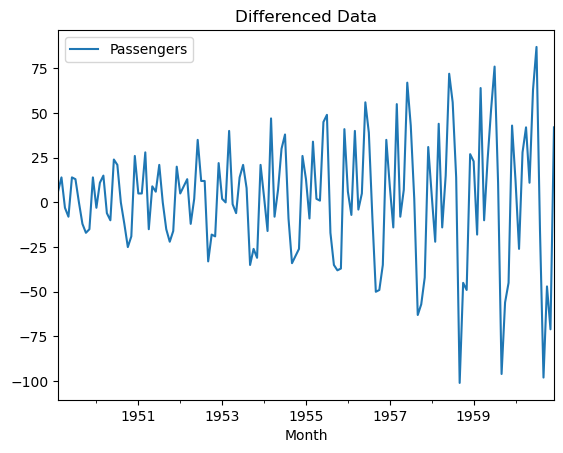

ADF Statistic: -2.829266824169992
p-value: 0.0542132902838265


In [21]:
data_diff = data.diff().dropna()

# Plot differenced data
data_diff.plot(title='Differenced Data')
plt.show()

# ADF Test again
result = adfuller(data_diff['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


In [23]:
from pmdarima import auto_arima

model = auto_arima(data['Passengers'], seasonal=True, m=12, trace=True)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.62 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.12 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.41 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.21 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.50 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.17 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.20 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.37 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.41 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.78 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.06 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.07 sec
 ARIMA(3,1,1)(0,1,0

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (example: ARIMA(2,1,2))
model = ARIMA(data['Passengers'], order=(2,1,2))
model_fit = model.fit()

# Forecast next 12 time steps
forecast = model_fit.forecast(steps=12)
print(forecast)



1961-01-01    439.855314
1961-02-01    465.297241
1961-03-01    500.666670
1961-04-01    535.971621
1961-05-01    561.688716
1961-06-01    571.311700
1961-07-01    562.970771
1961-08-01    539.727739
1961-09-01    508.527168
1961-10-01    478.147204
1961-11-01    456.748176
1961-12-01    449.698609
Freq: MS, Name: predicted_mean, dtype: float64


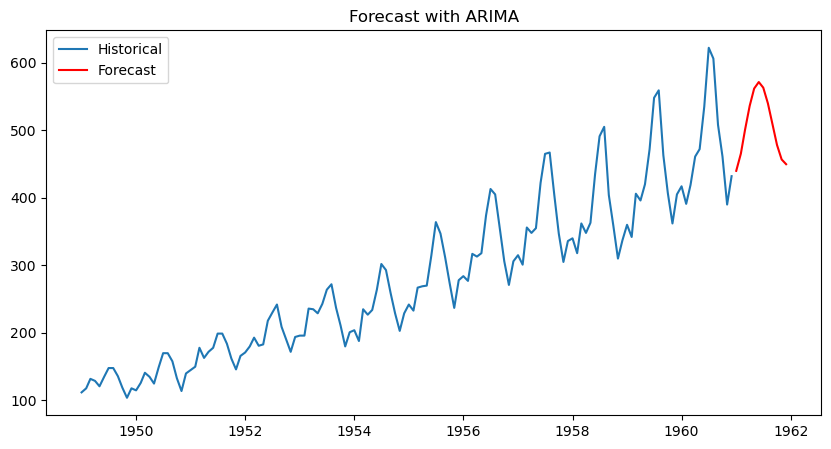

In [6]:
# Create forecast index
forecast_index = pd.date_range(data.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Passengers'], label='Historical')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Forecast with ARIMA')
plt.show()

